# Introduction:
**We will dive into features which might cause HeartDisease and gonna try to build a trusted  model to predict individual liklihood of developing a HeartDisease**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats
import matplotlib.style as style
from matplotlib import rcParams
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [23]:
df = pd.read_csv('df_cleaned.csv').drop(columns = 'Unnamed: 0', axis=1)
df_copy = pd.read_csv('df_encoded.csv')

In [3]:
def bar_chart(df,feature):
    type_counts = df[feature].value_counts()
    type_order = type_counts.index
    base_color = sns.color_palette()[0]
    n = df_copy[feature].value_counts().sum()
    sns.countplot(data=df, x= feature, color=base_color, order=type_order);

    type_counts = df[feature].value_counts()

    locs, labels = plt.xticks(rotation=90) 
    for loc, label in zip(locs, labels):
        count = type_counts[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/n)
        plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

**Ratio of HeartDisease is approximately balanced in data set**

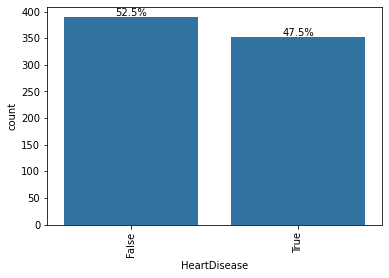

In [4]:
df_copy = df.copy()
df_copy['HeartDisease'] = df['HeartDisease'].astype(bool).astype(str)
bar_chart(df_copy,'HeartDisease')

**Propotion of Males to Females is 79% in our data set**

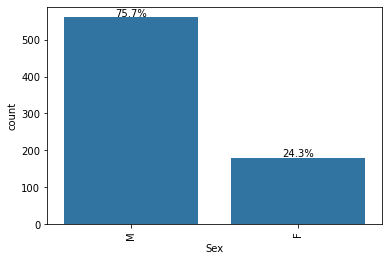

In [5]:
bar_chart(df,'Sex')

**Propotion of RestingECG in data set**

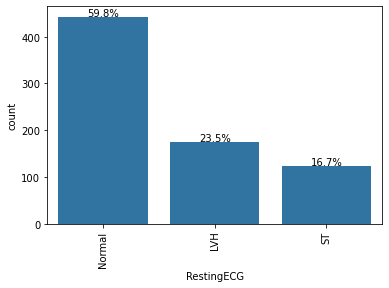

In [6]:
bar_chart(df,'RestingECG')

**propotions of ChestPainType in data set**

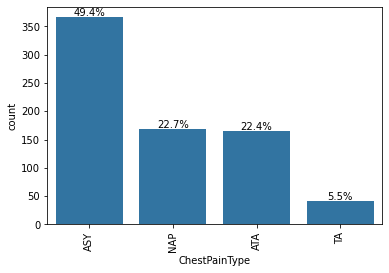

In [7]:
bar_chart(df,'ChestPainType')

In [20]:
def make_mi_scores(X,Target):
    for i in range(10):
        X = df.copy()
        y = X.pop(Target)
        for colname in X.select_dtypes("object"):
            X[colname], _ = X[colname].factorize()
        discrete_features = X.dtypes == int
        mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
        mi_scores = np.append([mi_scores], [mi_scores], axis=0)
    mi_scores = mi_scores.mean(axis=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)   
    return mi_scores

mi_scores = make_mi_scores(df,'HeartDisease')

**Most effective features in HeartDisease ocurring**

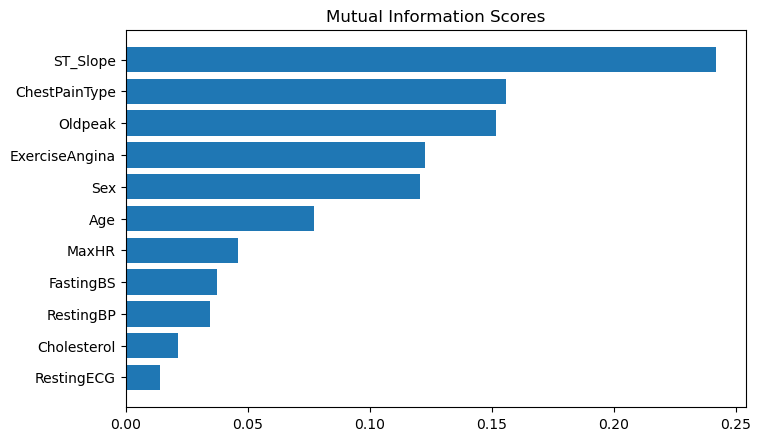

In [21]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

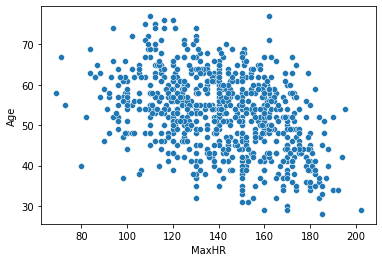

In [26]:
sns.scatterplot(data= df_copy, x="MaxHR", y="Age");

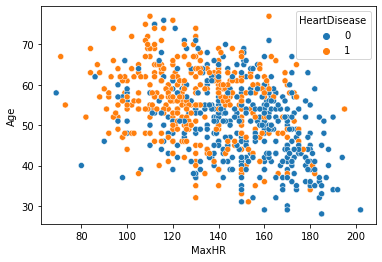

In [30]:
sns.scatterplot(data = df_copy, x = "MaxHR", y = "Age", hue = "HeartDisease");

**I wase able to build a machine learning model to predict HeartDisease occuring for indvidual with an an accuracy 86.54708520179372% which is promising that we could build more trusted model if we had enough data to use a deep learning**

In [31]:
def Pie_chart(df,c,target):
    fig, ax = plt.subplots(ncols=df[c].nunique(), figsize=(12,12))
    p = 0
    for i in df[c].unique():
        ax[p].set_title('-'*20+'\n'+str(c) +' : '+ str(i), size=16, fontweight='heavy')
        patches, texts, pcts = ax[p].pie(df[df[c]==i][target].value_counts().values,
                labels=df[df[c]==i][target].value_counts().index,
                    autopct="%1.2f%%", startangle=90, colors=['white', 'blue'],
                    wedgeprops={"edgecolor":"black"})
        plt.setp(pcts, **{'color':'black','weight':'heavy','size':12})
        p += 1 

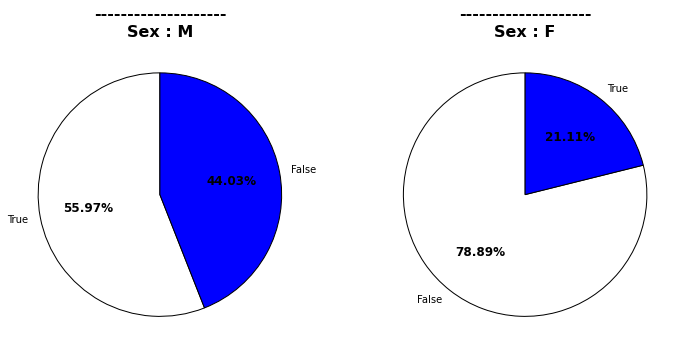

In [32]:
df_copy = df.copy()
df_copy['HeartDisease'] = df['HeartDisease'].astype(bool).astype(str)
Pie_chart(df_copy,'Sex','HeartDisease')

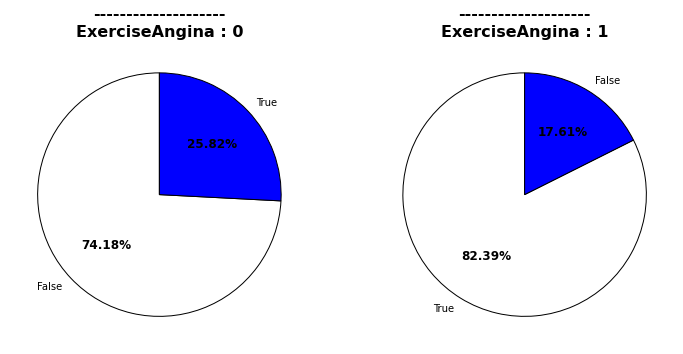

In [33]:
Pie_chart(df_copy,'ExerciseAngina','HeartDisease')

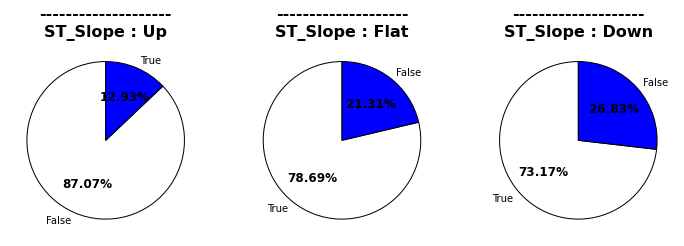

In [34]:
Pie_chart(df_copy,'ST_Slope','HeartDisease')

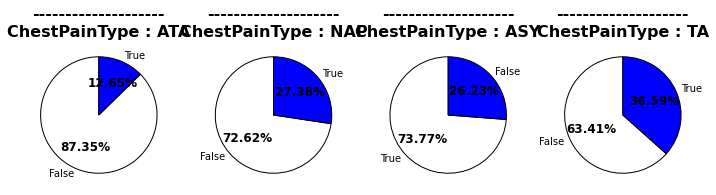

In [35]:
Pie_chart(df_copy,'ChestPainType','HeartDisease')

# Conclusions:
**limitation We could have built a stronger model if we got more enough data**

1-S_T slope highly correlated with heart disease

2-data has been gathered from males more than females however heart disease more likely to occure in men than females

3-ExerciseAngina more likely to keep heart diseas away if it's false

4-if ST_slope tends to be Flat or down individual more likely to get a heart disease

5-if ST_slope tends to be Up individual more likely to get a heart disease